# Week 5

## Problem 1.1

In [1]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
import math

def meaningful(x, digits = 3):
    if x == 0:
        return "0"
    magnitude = math.floor(math.log10(abs(x)))
    decimals = digits - magnitude - 1
    add = " "
    if x < 0:
        add = ""
    return add + f"{round(x, decimals):g}"

def get_file(url):
    last_bit = url.split("/")[-1]
    if os.path.exists(last_bit):
        return pd.read_csv(last_bit, sep="\t")
    response = requests.get(url)
    with open(last_bit, "w") as f:
        f.write(response.text)
    return pd.read_csv(last_bit, sep="\t")

fram = get_file("https://www.cs.helsinki.fi/u/ahonkela/teaching/stats4ds/data/passengercarmileage.txt")
print("First 6 rows of the Framingham data:")
print(fram.head(6))
print(f"\nDataset shape: {fram.shape}")
print(f"Columns: {list(fram.columns)}")
print("\nSummary statistics for key variables:")
print(fram[['MPG', 'HP']].describe())


First 6 rows of the Framingham data:
        makeAndModel  VOL  HP   MPG   SP    WT
0     GM/GeoMetroXF1   89  49  65.4   96  17.5
1        GM/GeoMetro   92  55  56.0   97  20.0
2     GM/GeoMetroLSI   92  55  55.9   97  20.0
3        SuzukiSwift   92  70  49.0  105  20.0
4    DaihatsuCharade   92  53  46.5   96  20.0
5  GM/GeoSprintTurbo   89  70  46.2  105  20.0

Dataset shape: (82, 6)
Columns: ['makeAndModel', 'VOL', 'HP', 'MPG', 'SP', 'WT']

Summary statistics for key variables:
             MPG          HP
count  82.000000   82.000000
mean   33.781707  117.134146
std    10.004605   56.840857
min    13.200000   49.000000
25%    27.775000   84.000000
50%    32.450000   99.000000
75%    39.300000  140.000000
max    65.400000  322.000000


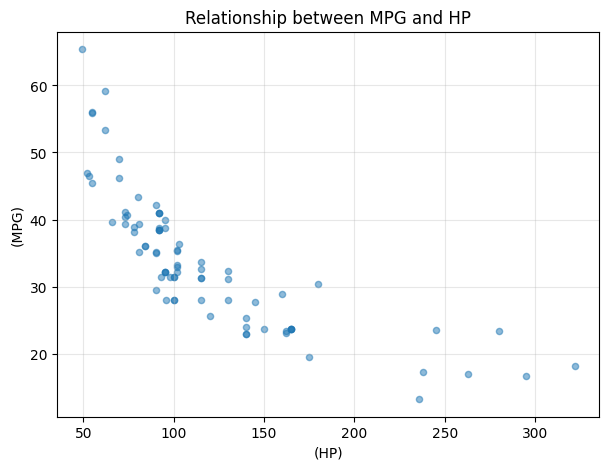

In [2]:
plt.figure(figsize=(7, 5))
plt.scatter(fram['HP'], fram['MPG'], alpha=0.5, s=20)
plt.xlabel('(HP)')
plt.ylabel('(MPG)')
plt.title('Relationship between MPG and HP')
plt.grid(True, alpha=0.3)
plt.show()

In [3]:
# Fit a linear regression model using statsmodels
model = smf.ols('MPG ~ HP', data=fram)
results = model.fit()

# Show the fitted equation
print(f"Fitted equation: MPG = {meaningful(results.params['Intercept'])} + {meaningful(results.params['HP'])} * HP")

Fitted equation: MPG =  50.1 + -0.139 * HP


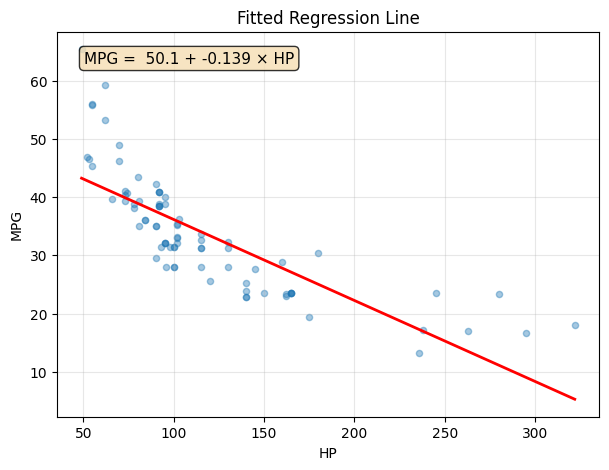

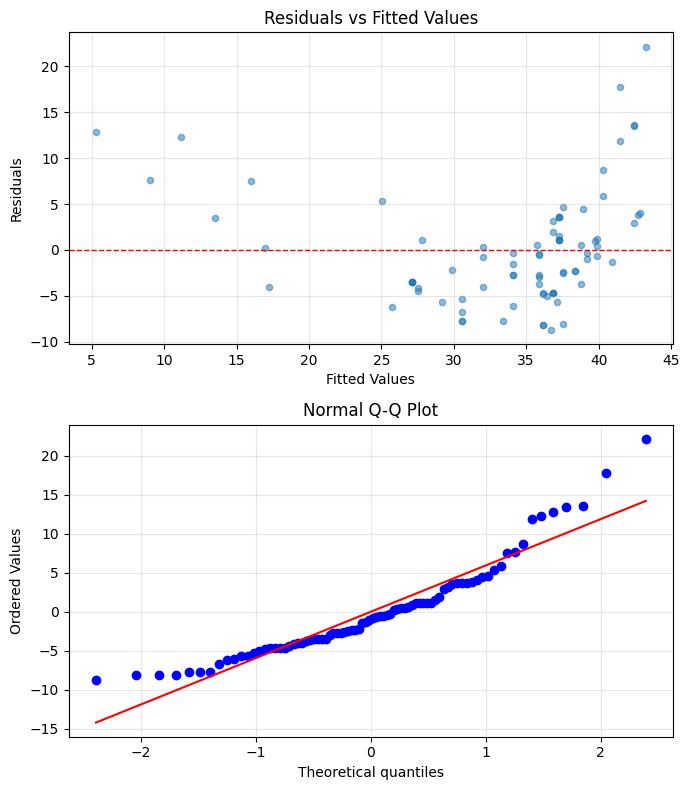

In [4]:
# Basic fitted line visualization
plt.figure(figsize=(7, 5))
plt.scatter(fram['HP'], fram['MPG'], alpha=0.4, s=20)
x_range = np.linspace(fram['HP'].min(), fram['HP'].max(), 100)
y_pred = results.params['Intercept'] + results.params['HP'] * x_range
plt.plot(x_range, y_pred, 'r-', linewidth=2, label='Fitted line')
plt.xlabel('HP')
plt.ylabel('MPG')
plt.title('Fitted Regression Line')
# Add equation to the plot
equation = f'MPG = {meaningful(results.params["Intercept"])} + {meaningful(results.params['HP'])} × HP'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.grid(True, alpha=0.3)
plt.show()

# Create diagnostic plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8))

# Get residuals and fitted values
residuals = results.resid
fitted = results.fittedvalues

# Plot 1: Residuals vs Fitted Values
ax1.scatter(fitted, residuals, alpha=0.5, s=20)
ax1.axhline(y=0, color='r', linestyle='--', linewidth=1)
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted Values')
ax1.grid(True, alpha=0.3)

# Plot 2: Q-Q plot for normality check
stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Normal Q-Q Plot')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Problem 1.2.

Fitted equation: LMPG =  4.01 + -0.00459 * HP


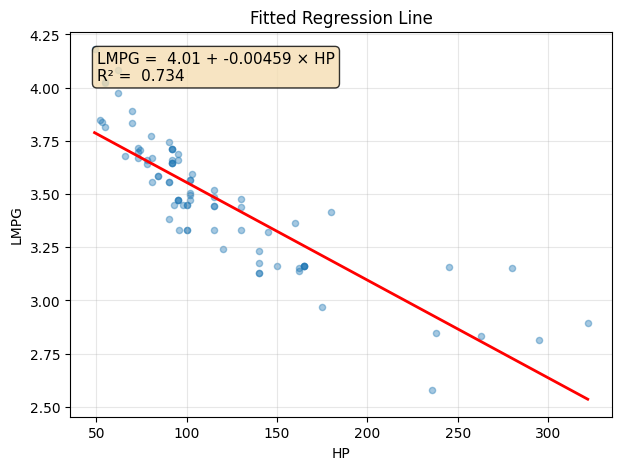

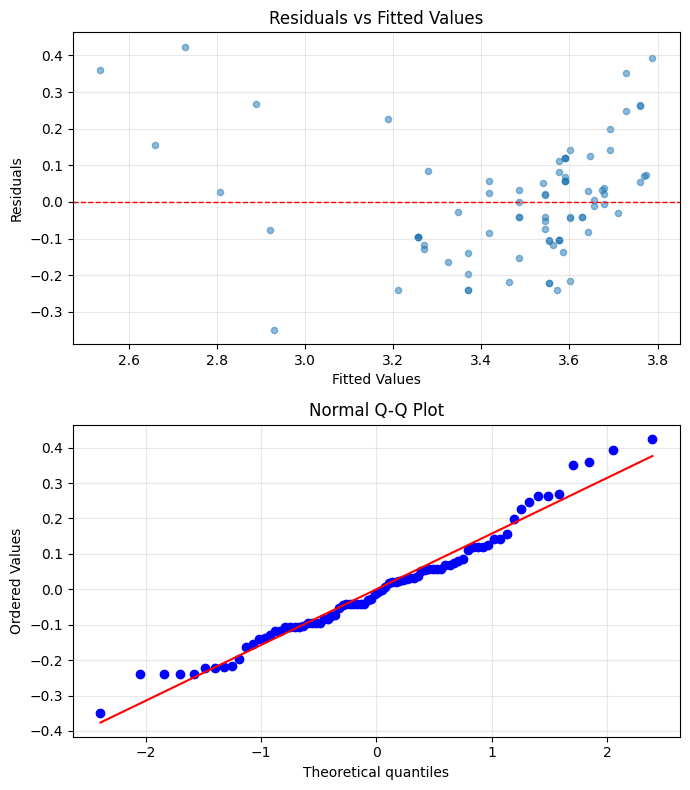

In [5]:
# Fit a linear regression model using statsmodels
fram_2 = fram.copy()
fram_2["LMPG"] = np.log(fram["MPG"])
lmodel = smf.ols('LMPG ~ HP', data=fram_2)
lresults = lmodel.fit()

# Show the fitted equation
print(f"Fitted equation: LMPG = {meaningful(lresults.params['Intercept'])} + {meaningful(lresults.params['HP'])} * HP")

# Basic fitted line visualization
plt.figure(figsize=(7, 5))
plt.scatter(fram_2['HP'], fram_2['LMPG'], alpha=0.4, s=20)
x_range = np.linspace(fram_2['HP'].min(), fram_2['HP'].max(), 100)
y_pred = lresults.params['Intercept'] + lresults.params['HP'] * x_range
plt.plot(x_range, y_pred, 'r-', linewidth=2, label='Fitted line')
plt.xlabel('HP')
plt.ylabel('LMPG')
plt.title('Fitted Regression Line')
# Add equation to the plot
equation = (
    f'LMPG = {meaningful(lresults.params["Intercept"])} '
    f'+ {meaningful(lresults.params["HP"])} × HP\n'
    f'R² = {meaningful(lresults.rsquared)}'
)
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.grid(True, alpha=0.3)
plt.show()
# Create diagnostic plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8))

# Get residuals and fitted values
residuals = lresults.resid
fitted = lresults.fittedvalues

# Plot 1: Residuals vs Fitted Values
ax1.scatter(fitted, residuals, alpha=0.5, s=20)
ax1.axhline(y=0, color='r', linestyle='--', linewidth=1)
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted Values')
ax1.grid(True, alpha=0.3)

# Plot 2: Q-Q plot for normality check
stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Normal Q-Q Plot')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Problem 1.3.

In [6]:
dependent_vars = [i for i in list(fram) if i not in ['makeAndModel', 'MPG']]
params = " + ".join(dependent_vars)

mmodel = smf.ols(f'MPG ~ {params}', data=fram).fit()

print("\nMultiple Regression (Model 2):")
for var in dependent_vars:
    print(f"\t{var} coefficient: {meaningful(mmodel.params[var])} (SE ={meaningful(mmodel.bse[var])})")
print(f"\tR-squared: {meaningful(mmodel.rsquared)}")
print(f"\tIntercept: {meaningful(mmodel.params['Intercept'])}")


Multiple Regression (Model 2):
	VOL coefficient: -0.0156 (SE = 0.0228)
	HP coefficient:  0.392 (SE = 0.0814)
	SP coefficient: -1.29 (SE = 0.245)
	WT coefficient: -1.86 (SE = 0.213)
	R-squared:  0.873
	Intercept:  192


### Problem 2.1.

Model: $Y_i = \beta X_i + \epsilon_i$

Task: Find the least squares estimate for $\beta$ given $X_1,\dots,X_n$ and $Y_1,\dots,Y_n$

Notes:
* Model goes through origin
* For point $(X_j, Y_j)$, the square difference is For $Y_j$ is $(\beta X_j - Y_j)^2$

Answer:

Residual sum of squares:

$RSS = \sum_{i=1}^n (Y_i - \hat \beta X_i)^2$

Taking the derivative:

$$
\frac{\partial RSS}{\partial \hat \beta} = -2 \sum_{i=1}^n X_i(Y_i - \hat \beta X_i)
$$

Setting derivative to 0:

$$
-2 \sum_{i=1}^nX_i(Y_i - \hat \beta X_i) = 0\\
-2 \sum_{i=1}^nX_iY_i + 2 \sum_{i=1}^n \hat \beta X_i^2 = 0\\
\sum_{i=1}^n \hat \beta X_i^2 = \sum_{i=1}^nX_iY_i\\
\hat \beta\sum_{i=1}^n  X_i^2 = \sum_{i=1}^nX_iY_i\\
\hat \beta= \frac{\sum_{i=1}^nX_iY_i}{\sum_{i=1}^n  X_i^2 } \\
$$


## Problem 2.2.

$\hat \beta= \frac{\sum_{i=1}^nX_iY_i}{\sum_{i=1}^n  X_i^2 }$

Task: Assume now that $E(X_i\epsilon_i) = 0, \forall i$. Calculate the bias of the least squares estimator

$Bias(\hat \beta) = E[\hat \beta]  - \beta$

$Y_i = \beta X_i + \epsilon_i$
$$
\begin{aligned}
\hat \beta&= \frac{\sum_{i=1}^nX_i(\beta X_i + \epsilon_i)}{\sum_{i=1}^n  X_i^2 } \\
\hat \beta&= \frac{\sum_{i=1}^n(\beta X_i^2 + X_i\epsilon_i)}{\sum_{i=1}^n  X_i^2 } \\
\hat \beta&= \frac{\beta\sum_{i=1}^n X_i^2 + \sum_{i=1}^n X_i\epsilon_i}{\sum_{i=1}^n  X_i^2 } \\
\hat \beta&= \beta + \sum_{i=1}^n X_i\epsilon_i \\
\end{aligned}
$$

$$
\begin{aligned}
E[\hat \beta] &= E\left[\beta + \sum_{i=1}^n X_i\epsilon_i \right]\\
\end{aligned}
$$
Since $E(X_i\epsilon_i) = 0, \forall i$, we can remove the term $\sum_{i=1}^n( X_i\epsilon_i)$
$$
\begin{aligned}
E[\hat \beta]&= E[\beta]\\
E[\hat \beta]&= \beta\\
\end{aligned}
$$

$Bias(\hat \beta) = E[\hat \beta]  - \beta = \beta - \beta = 0$

### 3. (Computer exercise) 

In this exercise, we will apply Bayesian inference with different priors to normally distributed data.  

Consider a set of $n = 20$ observations $X_1, \dots, X_n \sim N(\theta, \sigma^2)$:  

$(-0.02, -0.03, 0.82, -1.05, -0.76, 0.46, -0.06, 0.34, -0.08, -0.24, 1.43, 1.07, -2.5, 1.48, 2.16, 1.23, -0.21, -0.69, 0.73, -0.62)$  

## Problem 3.1. 

Task: Apply PyMC to perform inference on $\theta$ when $\sigma^2 = 1$ using the prior $\theta \sim N(0, \sigma_0^2)$ with $\sigma_0^2 = 0.4^2$.  
   Report the posterior mean and standard deviation to Moodle.  
   **NOTE:** Remember to check the convergence of the chains with a trace plot and R-hat of the parameter!  



## Problem 3.2. 

Task: Perform joint inference over $\theta$ and $\sigma$ using the priors $\theta \sim N(0, \sigma_0^2)$ with $\sigma_0^2 = 0.4^2$ and $\sigma \sim \text{Gamma}(2, 2)$.  
   Report the posterior mean and standard deviation for both the $\theta$ and $\sigma$.  
   Again, remember to check the convergence!  


In [7]:
import pymc as pm
import numpy as np

# --- Data and Hyperparameters ---
X_data = np.array([-0.02, -0.03, 0.82, -1.05, -0.76, 0.46, -0.06, 0.34, -0.08, -0.24, 1.43, 1.07, -2.5 , 1.48, 2.16, 1.23, -0.21, -0.69, 0.73, -0.62])  # The observed data
sigma_known = 1.0        # Standard deviation for data (known)
theta_mean = 0.0         # Prior mean for theta
theta_std = 0.4          # Prior standard deviation for theta

# --- Model Definition ---
with pm.Model() as model_part_a:
    # Prior for theta
    theta = pm.Normal('theta', mu=theta_mean, sigma=theta_std)

    # Likelihood of the data
    X_obs = pm.Normal('X_obs', mu=theta, sigma=sigma_known, observed=X_data)
    trace = pm.sample()

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 63 seconds.


In [12]:
import arviz as az

# Show summary stats (mean, sd, R-hat, etc.)
print(az.summary(trace, var_names=["theta"]))

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta  0.132  0.194  -0.215    0.511      0.005    0.003    1839.0    2966.0   

       r_hat  
theta    1.0  


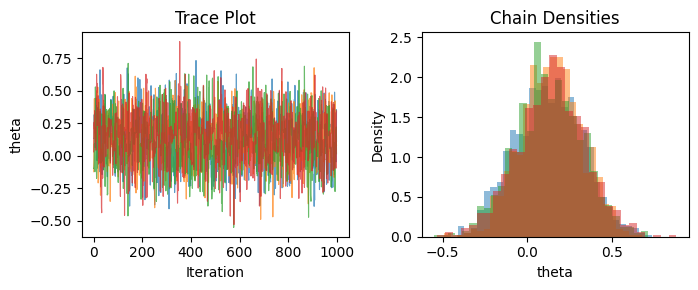

In [13]:
# Create trace plot for visual inspection
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Extract mu samples for all chains
mu_samples = trace.posterior["theta"].values

# Plot traces for each chain
for chain in range(mu_samples.shape[0]):
    axes[0].plot(mu_samples[chain, :], alpha=0.7, linewidth=0.8)
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("theta")
axes[0].set_title("Trace Plot")

# Plot overlaid densities
for chain in range(mu_samples.shape[0]):
    axes[1].hist(mu_samples[chain, :], bins=30, alpha=0.5, density=True)
axes[1].set_xlabel("theta")
axes[1].set_ylabel("Density")
axes[1].set_title("Chain Densities")

plt.tight_layout()
plt.show()

## Problem 2.2.

Task: Perform join inference over $\theta$ when $\sigma$ using priors $\theta \sim N(0, \sigma_0^2)$ with $\sigma_0^2=0.4$ and $\sigma \sim Gamma(2,2)$

In [36]:
import arviz as az
import pymc as pm
import numpy as np

# --- Data and Hyperparameters ---
X_data_2 = np.array([-0.02, -0.03, 0.82, -1.05, -0.76, 0.46, -0.06, 0.34, -0.08, -0.24, 1.43, 1.07, -2.5 , 1.48, 2.16, 1.23, -0.21, -0.69, 0.73, -0.62])  # The observed data
# sigma_known = 1.0        # Standard deviation for data (known)
theta_mean = 0.0         # Prior mean for theta
theta_std = 0.4          # Prior standard deviation for theta

# --- Model Definition ---
with pm.Model() as model_part_a:
    # Prior for theta
    theta_2 = pm.Normal('theta', mu=theta_mean, sigma=theta_std)
    sigma_2 = pm.Gamma('sigma', alpha=2, beta=2)

    # Likelihood of the data
    X_obs = pm.Normal('X_obs', mu=theta_2, sigma=sigma_2, observed=X_data_2)
    trace_2 = pm.sample()


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 78 seconds.


In [35]:
print(az.summary(trace_2, var_names=["theta", "sigma"]))


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
theta  0.129  0.204  -0.266    0.501      0.003    0.003    3692.0    2619.0   
sigma  1.090  0.174   0.795    1.430      0.003    0.004    3447.0    2709.0   

       r_hat  
theta    1.0  
sigma    1.0  


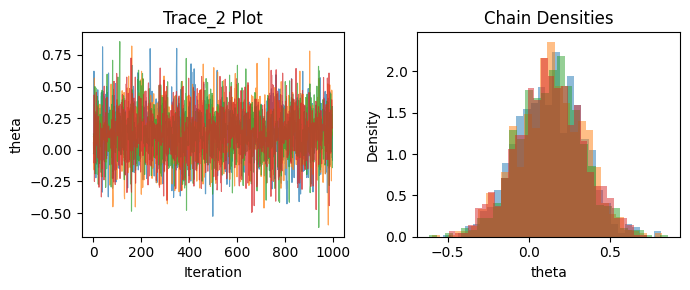

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Extract mu samples for all chains
mu_samples = trace_2.posterior["theta"].values

# Plot trace_2s for each chain
for chain in range(mu_samples.shape[0]):
    axes[0].plot(mu_samples[chain, :], alpha=0.7, linewidth=0.8)
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("theta")
axes[0].set_title("Trace_2 Plot")

# Plot overlaid densities
for chain in range(mu_samples.shape[0]):
    axes[1].hist(mu_samples[chain, :], bins=30, alpha=0.5, density=True)
axes[1].set_xlabel("theta")
axes[1].set_ylabel("Density")
axes[1].set_title("Chain Densities")

plt.tight_layout()
plt.show()

## Problem 4.1

Task: (Computer exercise) Robust linear regression with Student-t noise.

In this exercise we will implement a linear regression model in PyMC, and study how using another noise distribution instead of normal will help make the model more robust to outliers.

We will use the following data:
x (input) = (1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0)
y (output) = (1.06, 2.07, 2.97, 4.01, 5.13, 5.92, 6.91, 0.00, 9.15, 9.90).

Implement a linear regression model for $\beta, \beta_0$

$y_i = \beta x_i + \beta_0 + \epsilon_i$

$\epsilon_i \sim N(0, \sigma^2)$

Priors:

$\beta_0, \beta \sim N(0,1)$ for regression weights 

and $\sigma \sim Gamma(0.1, 1)$ for the noise

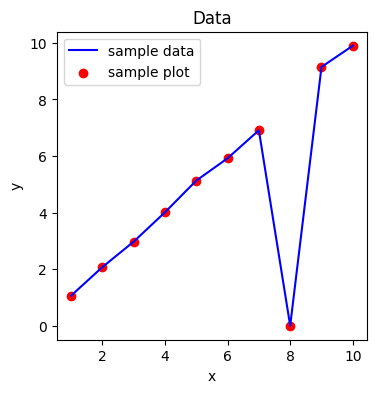

In [73]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pymc import Gamma, Model, Normal, sample

x = np.arange(1, 11)
y = [1.06, 2.07, 2.97, 4.01, 5.13, 5.92, 6.91, 0.00, 9.15, 9.90]

data = pd.DataFrame({"x": x, "y": y})

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Data")
ax.plot(x, y, label="sample data", color = 'blue')
ax.scatter(x, y, label="sample plot", color="red")
# ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0)

In [ ]:
with Model() as model:
    # Define priors
    sigma = Gamma("sigma", alpha=0.1, beta=1)
    intercept = Normal("Intercept", 0, sigma=1)
    slope = Normal("slope", 0, sigma=1)
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)
    idata = sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 110 seconds.


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

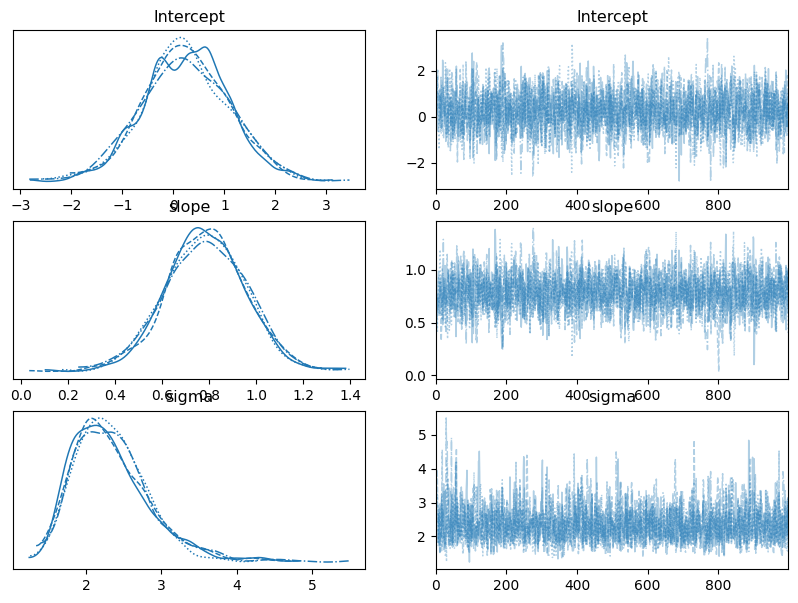

In [39]:
az.plot_trace(idata, figsize=(10, 7))

            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept  0.246  0.851  -1.262    1.920      0.020    0.015    1746.0   
slope      0.784  0.172   0.437    1.082      0.004    0.003    1802.0   
sigma      2.339  0.514   1.474    3.262      0.011    0.013    2124.0   

           ess_tail  r_hat  
Intercept    2055.0    1.0  
slope        2096.0    1.0  
sigma        2096.0    1.0  
Mean Intercept:	0.246
Mean slope:	0.784
Mean sigma:	2.339


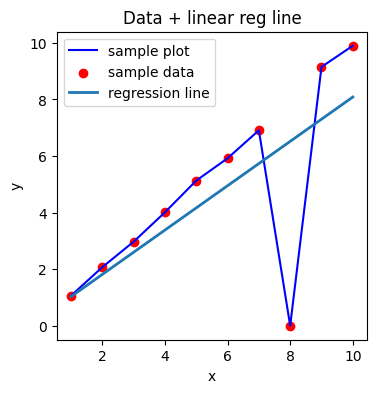

In [72]:
means = az.summary(idata, var_names=["Intercept", "slope", "sigma"])["mean"]
print(az.summary(idata, var_names=["Intercept", "slope", "sigma"]))
vals = ["Intercept", "slope", "sigma"]

intercept_mean = means["Intercept"]
slope_mean = means["slope"]
sigma_mean = means["sigma"]
for val in vals:
    print(f"Mean {val}:\t{means[val]}")

regression_line = intercept_mean + slope_mean * x

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Data + linear reg line")
ax.plot(x, y, label="sample plot", color = 'blue')
ax.scatter(x, y, label="sample data", color="red")
ax.plot(x, regression_line, label="regression line", lw=2.0)
plt.legend(loc=0)

## Problem 4.2.

Task: Implement a robust regression model using the same data with a robust noise model $\epsilon \sim t_v(0, \sigma^2)$, where $t_v$ denotes the Student’s t-distribution with $v$ degrees of freedom. 

Use $v=3$ while keeping other parameters ($u$ and $\sigma$) the same as in the previous task. 

Check convergence of the parameters. 

Again plot the data with a posterior mean regression line. 

Does the model seem to fit the data better?

In [74]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

x_1 = np.arange(1, 11)
y_1 = [1.06, 2.07, 2.97, 4.01, 5.13, 5.92, 6.91, 0.00, 9.15, 9.90]

In [47]:
with pm.Model() as robust_model:
    # priors
    intercept = pm.Normal("intercept", mu=0, sigma=1)
    slope = pm.Normal("slope", mu=0, sigma=1)
    sigma = pm.Gamma("sigma", alpha=0.1, beta=1)

    # likelihood with Student-t noise
    mu = intercept + slope * x_1
    likelihood = pm.StudentT("y", mu=mu, sigma=sigma, nu=3, observed=y_1)

    # inference
    robust_trace = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 216 seconds.


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

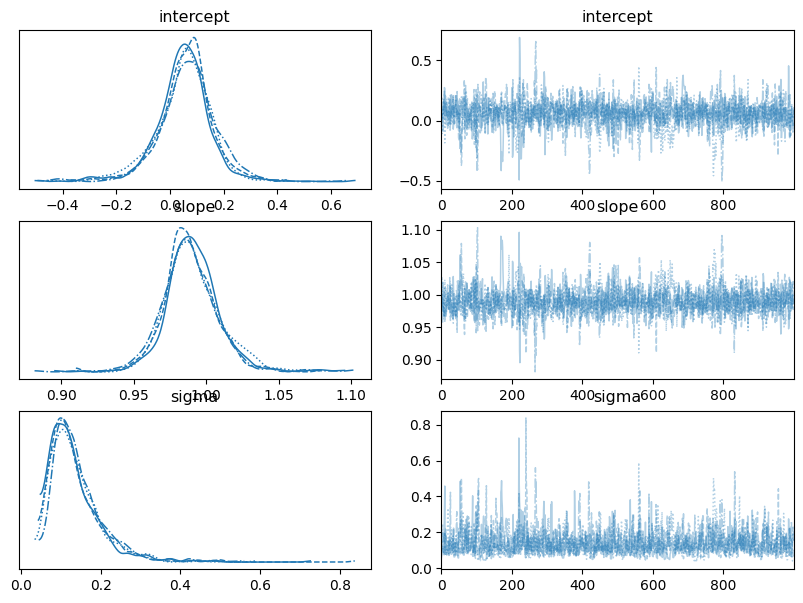

In [75]:
az.plot_trace(robust_trace, figsize=(10, 7))

Means:
	Mean intercept:        	0.056
	Mean slope:        	0.99
	Mean sigma:        	0.137
r_hats:
	r_hat intercept:       	1.01
	r_hat slope:       	1.01
	r_hat sigma:       	1.01


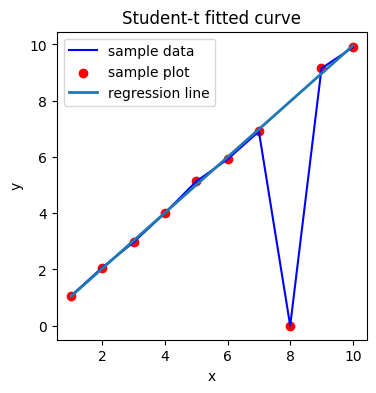

In [77]:
means = az.summary(robust_trace, var_names=["intercept", "slope", "sigma"])["mean"]
r_hats = az.summary(robust_trace, var_names=["intercept", "slope", "sigma"])["r_hat"]
vals = ["intercept", "slope", "sigma"]

intercept_mean = means["intercept"]
slope_mean = means["slope"]
sigma_mean = means["sigma"]
print("Means:")
for val in vals:
    print(f"\tMean {val}:        \t{means[val]}")
print("r_hats:")
for val in vals:
    print(f"\tr_hat {val}:       \t{r_hats[val]}")

regression_line = intercept_mean + slope_mean * x

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Student-t fitted curve")
ax.plot(x, y, label="sample data", color = 'blue')
ax.scatter(x, y, label="sample plot", color="red")
ax.plot(x, regression_line, label="regression line", lw=2.0)
plt.legend(loc=0)

## Problem 5.1.

Fit a bayesian linear regression model: 

$y_i = \beta x_i + \beta_0 + \epsilon_i$ 

using PyMC to predict log_radon as a function of floor, ignoring the county information when constructing the model. 

* Remember to define suitable priors for all unknown parameters! 
* Check the convergence of the parameters. 
* Compare the errors in model predictions for different counties, i.e. the absolute difference between true values and predictions grouped by county. 
* Do you observe any differences?



WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


['log_radon', 'floor', 'county']
   log_radon  floor  county
0   0.788457      1       1
1   0.788457      0       1
2   1.064711      0       1
3   0.000000      0       1
4   1.131402      0       2


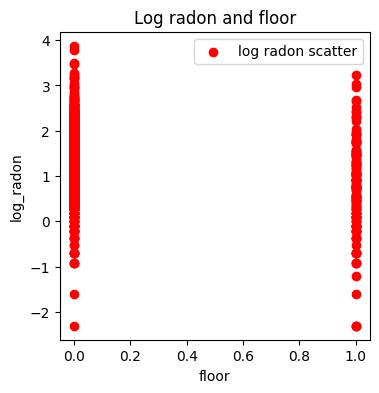

In [7]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
df = get_file("https://www.cs.helsinki.fi/u/ahonkela/teaching/stats4ds/data/radon.txt")
floor = df["floor"]
log_radon = df["log_radon"]

print(list(df))
print(df.head(5))

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, xlabel="floor", ylabel="log_radon", title="Log radon and floor")
ax.scatter(floor, log_radon, label="log radon scatter", color="red")
plt.legend(loc=0)

In [ ]:
with pm.Model() as model:
    sigma = pm.HalfNormal("sigma", sigma=1)
    intercept = pm.Normal("Intercept", 0, sigma=1)
    slope = pm.Normal("slope", 0, sigma=1)
    likelihood = pm.Normal("y", mu=intercept + slope * floor, sigma=sigma, observed=log_radon)
    lin_reg_rad_data = pm.sample(draws = 500, tune=500, idata_kwargs={"log_likelihood": True})

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]


Output()

Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 803 seconds.


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

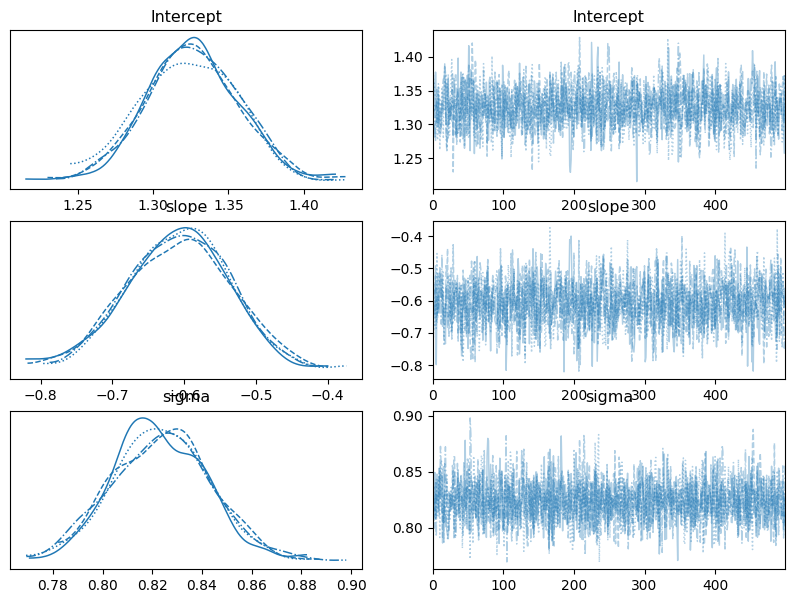

In [29]:
az.plot_trace(lin_reg_rad_data, figsize=(10, 7))

Means:
	Mean Intercept:        	1.325
	Mean slope:        	-0.608
	Mean sigma:        	0.824
r_hats:
	r_hat Intercept:       	1.0
	r_hat slope:       	1.0
	r_hat sigma:       	1.0


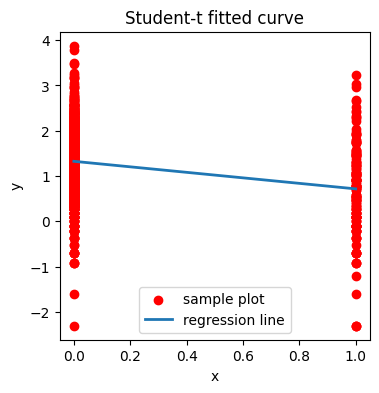

In [30]:
means = az.summary(lin_reg_rad_data, var_names=["Intercept", "slope", "sigma"])["mean"]
r_hats = az.summary(lin_reg_rad_data, var_names=["Intercept", "slope", "sigma"])["r_hat"]
vals = ["Intercept", "slope", "sigma"]

Intercept_mean = means["Intercept"]
slope_mean = means["slope"]
sigma_mean = means["sigma"]
print("Means:")
for val in vals:
    print(f"\tMean {val}:        \t{means[val]}")
print("r_hats:")
for val in vals:
    print(f"\tr_hat {val}:       \t{r_hats[val]}")

regression_line = Intercept_mean + slope_mean * floor

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Student-t fitted curve")
ax.scatter(floor, log_radon, label="sample plot", color="red")
ax.plot(floor, regression_line, label="regression line", lw=2.0)
plt.legend(loc=0)

## Problem 5.2.

In contrast to the complete-pooling model above, we can make the model fit observations from individual counties better by allowing the parameters to vary in each county. For simplicity, we will only do so for the intercept term.  

Fit a modified linear regression model:  

$y_i = \beta x_i + \beta_{0,j} + \epsilon_i,$  

where $j$ denotes the county the observation $i$ comes from. Fit this model using the same priors as in (1).  

* Check convergence of some of the parameters (e.g. $\mu_\beta, \sigma_\beta, \beta_{0,1}, \beta_{0,23}, \beta$ and $\sigma$).  
* Compare the errors of the model predictions with the previous model.  
* Hint: It can be useful to compare the errors of the model predictions as a function of the number of observations in a county.  


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_county_beta_0, sigma_county_epsilon, intercepts_counties, slope, sigma]


Output()

Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 4589 seconds.


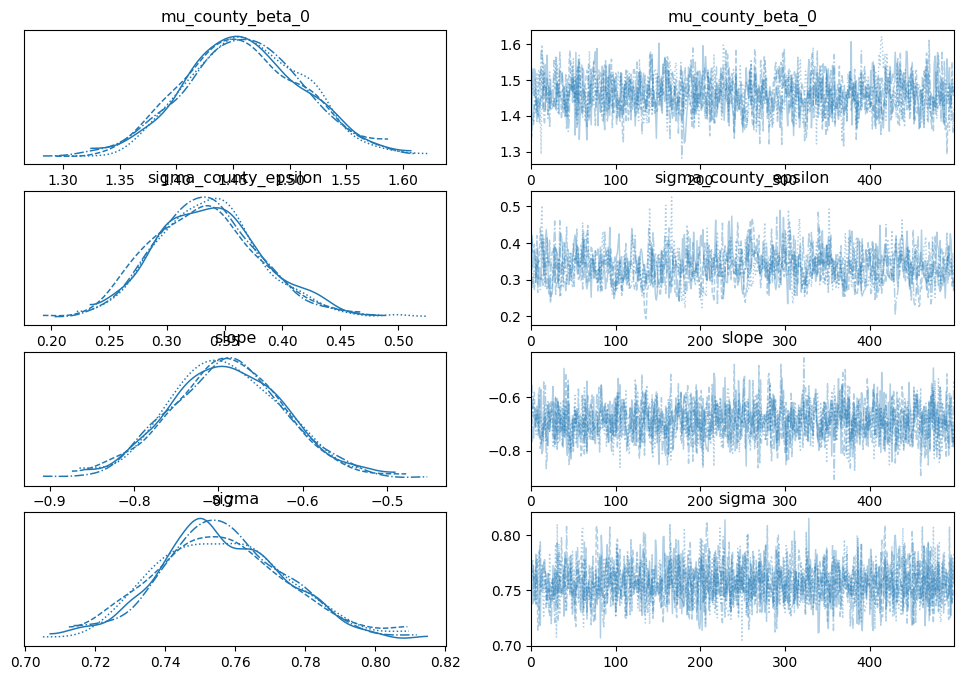

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

df = get_file("https://www.cs.helsinki.fi/u/ahonkela/teaching/stats4ds/data/radon.txt")
floor = df["floor"].values
log_radon = df["log_radon"].values
# county = df["county"]
county = df["county"].astype("category").cat.codes.values  # numeric codes for counties
# print(county)
n_counties = len(np.unique(county))

with pm.Model() as pooling_model:
    mu_county_beta_0 = pm.Normal("mu_county_beta_0", mu=0, sigma=1)
    sigma_county_epsilon = pm.HalfNormal("sigma_county_epsilon", sigma=1)

    intercepts_counties = pm.Normal("intercepts_counties", mu=mu_county_beta_0, sigma=sigma_county_epsilon, shape=n_counties)

    slope = pm.Normal("slope", mu=0, sigma=1)
    sigma = pm.HalfNormal("sigma", sigma=1)
    mu = intercepts_counties[county] + slope * floor
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=log_radon)

    trace_partial = pm.sample(draws=500, tune=500, idata_kwargs={"log_likelihood": True})

az.plot_trace(trace_partial, var_names=["mu_county_beta_0", "sigma_county_epsilon", "slope", "sigma"], figsize=(12, 8))
plt.show()

In [36]:

summary = az.summary(trace_partial, var_names=["mu_county_beta_0", "sigma_county_epsilon", "slope", "sigma"])
print(summary)

beta_mean = summary.loc["slope", "mean"]
sigma_mean = summary.loc["sigma", "mean"]

print("beta mean =", beta_mean)
print("sigma mean =", sigma_mean)

summary_full = az.summary(trace_partial)

print("intercepts_counties[0] mean =", summary_full.loc["intercepts_counties[0]", "mean"])
print("intercepts_counties[22] mean =", summary_full.loc["intercepts_counties[22]", "mean"])


                       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
mu_county_beta_0      1.460  0.052   1.367    1.559      0.002    0.001   
sigma_county_epsilon  0.336  0.046   0.250    0.423      0.002    0.001   
slope                -0.689  0.067  -0.811   -0.559      0.002    0.001   
sigma                 0.756  0.018   0.724    0.793      0.000    0.000   

                      ess_bulk  ess_tail  r_hat  
mu_county_beta_0        1028.0    1290.0    1.0  
sigma_county_epsilon     674.0     993.0    1.0  
slope                   1733.0    1720.0    1.0  
sigma                   2424.0    1601.0    1.0  
beta mean = -0.689
sigma mean = 0.756
intercepts_counties[0] mean = 1.184
intercepts_counties[22] mean = 1.462


In [37]:
# loo_county = az.loo(trace_partial)
# loo_pooled = az.loo(lin_reg_rad_data)

comparison = az.compare({
"Pooled": trace_partial,
"Non-pooled": lin_reg_rad_data
})
print(comparison)


TypeError: Encountered error in ELPD computation of compare.